In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/tgt.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/07/14,53.23,52.470000,51.600,51.761,51.738000,51.6225,52.7168,53.091667
2017/07/13,53.31,51.530000,51.168,51.647,51.564667,51.7340,52.7728,53.172667
2017/07/12,50.87,50.486667,50.794,51.522,51.378667,51.9615,52.8192,53.234000
2017/07/11,50.41,50.553333,51.052,51.642,51.381333,52.2870,52.9676,53.369667
2017/07/10,50.18,50.896667,51.500,51.749,51.468000,52.6600,53.1764,53.502667


In [7]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/07/14,0.000000,0.000000,0.0,0.0
2017/07/13,-0.001501,0.000000,0.0,0.0
2017/07/12,0.047965,0.000000,0.0,0.0
2017/07/11,0.009125,0.037914,0.0,0.0
2017/07/10,0.004583,0.012444,0.0,0.0


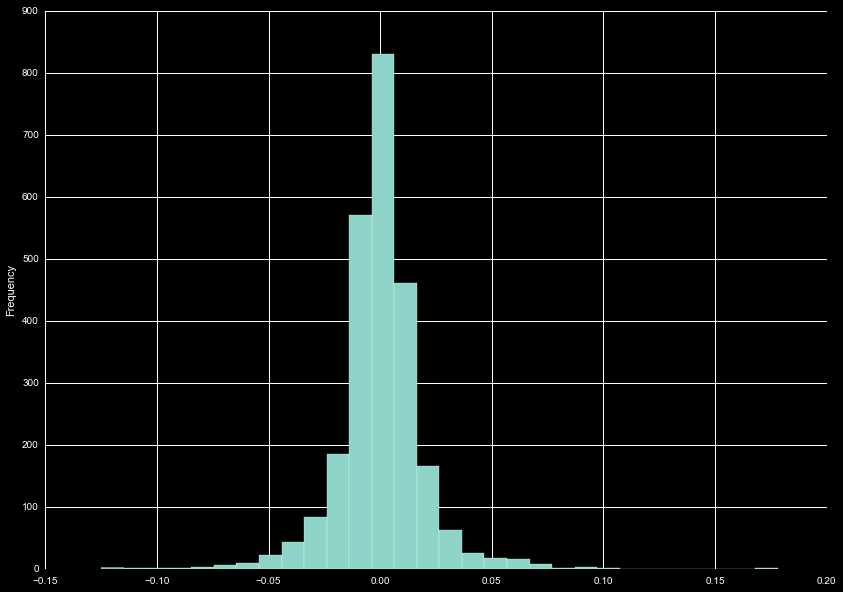

In [8]:
bar['close'].plot.hist( bins=30 )

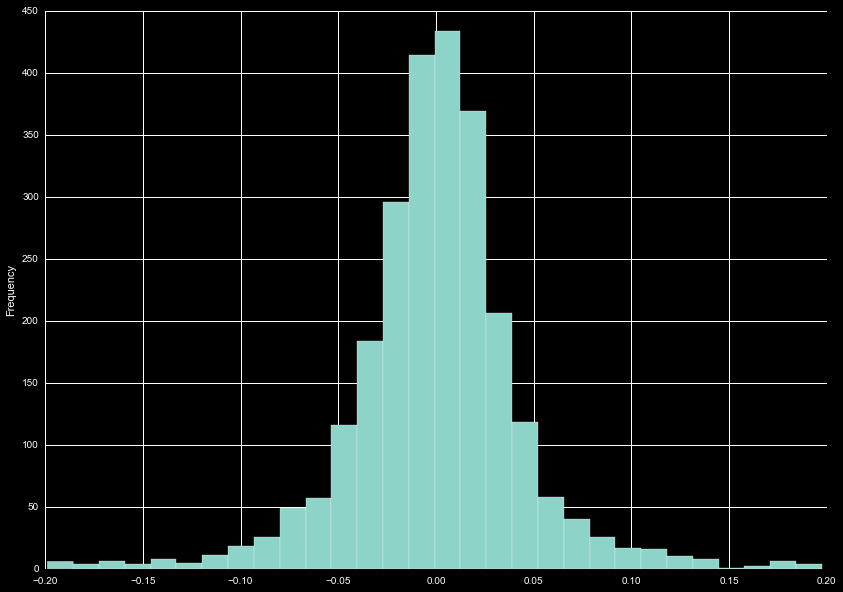

In [9]:
bar['close_mean_10'].plot.hist( bins=30 )

In [10]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.000119
std         0.043170
min        -0.198986
25%        -0.020342
50%         0.000610
75%         0.020640
max         0.197616
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


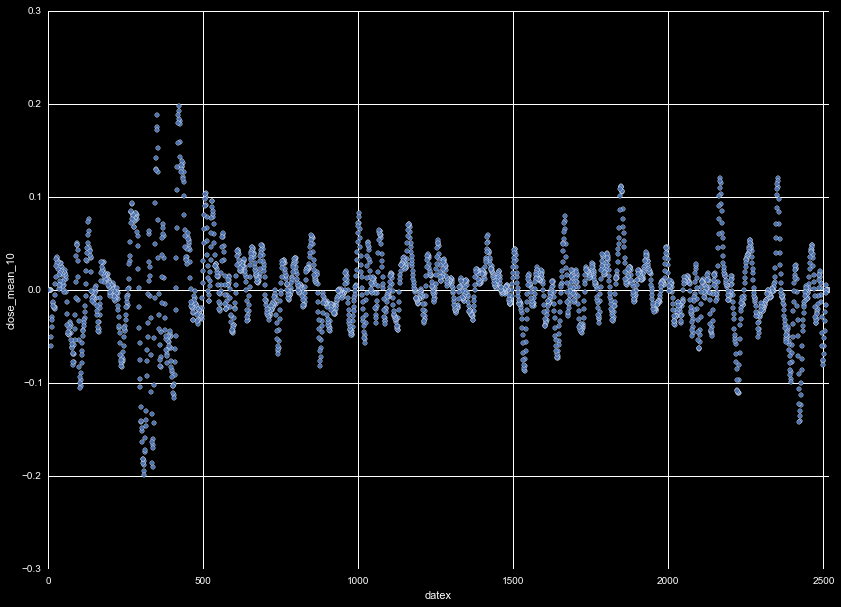

In [11]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [12]:
foobar = bar.join( diffs, how='inner' )

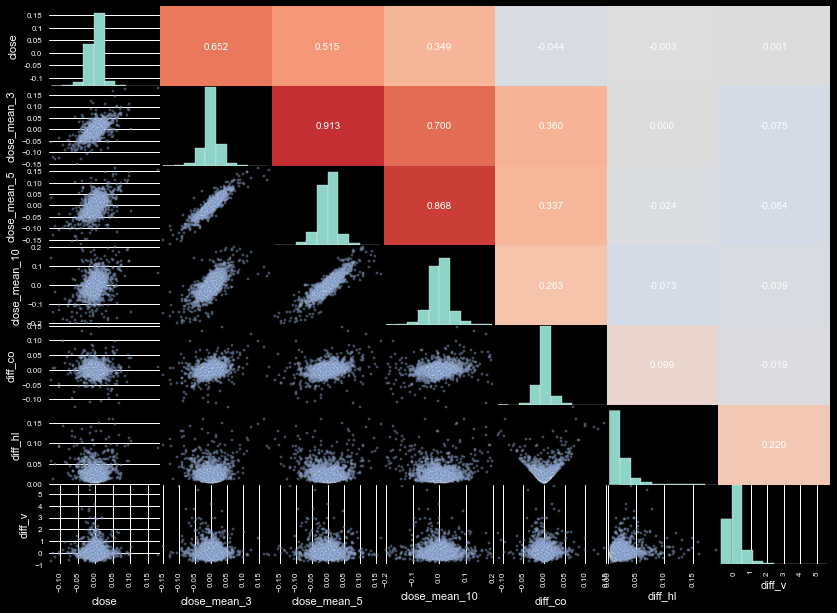

In [13]:
dv.corr_plot( foobar, corr_method = 'pearson')

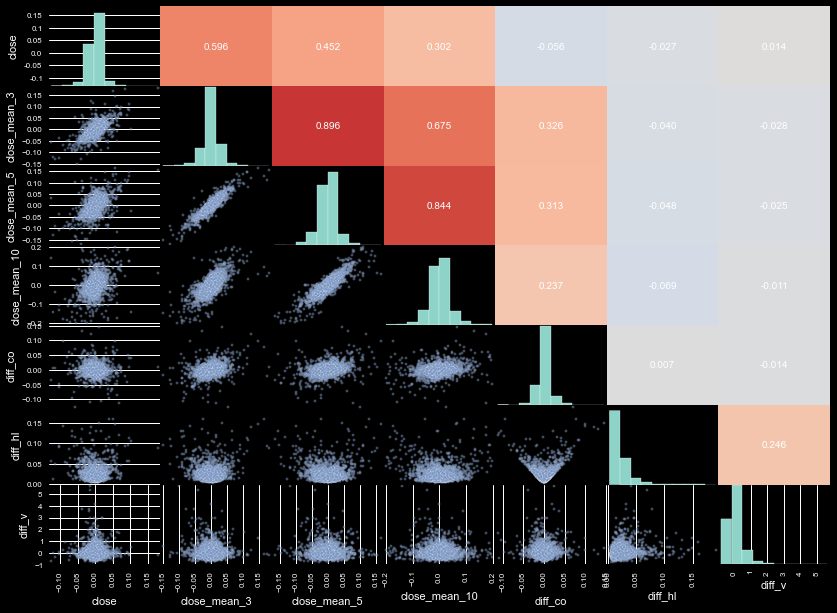

In [14]:
dv.corr_plot( foobar )

In [15]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.043625
diff_hl   -0.002880
diff_v     0.000934
dtype: float64
diff_co    0.359973
diff_hl    0.000332
diff_v    -0.075381
dtype: float64
diff_co    0.337349
diff_hl   -0.023641
diff_v    -0.064458
dtype: float64
diff_co    0.263145
diff_hl   -0.072933
diff_v    -0.038966
dtype: float64


In [91]:
# Diffs appear to be useful

In [16]:
foobar = bar.join( moms, how='inner' )

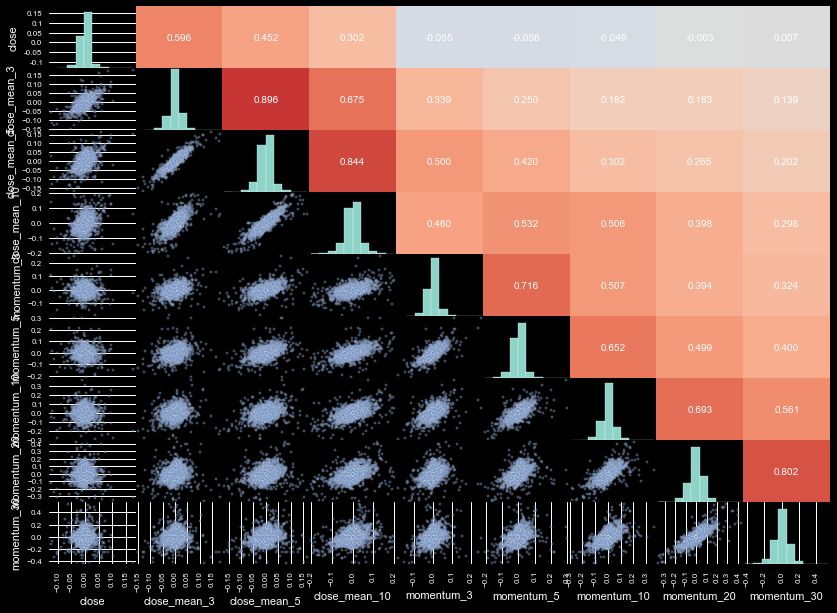

In [17]:
dv.corr_plot( foobar )

In [18]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.053999
momentum_5    -0.065642
momentum_10   -0.036147
momentum_20   -0.014378
momentum_30   -0.013870
dtype: float64
momentum_3     0.350172
momentum_5     0.248365
momentum_10    0.205472
momentum_20    0.150790
momentum_30    0.121344
dtype: float64
momentum_3     0.527021
momentum_5     0.438681
momentum_10    0.334046
momentum_20    0.248237
momentum_30    0.199272
dtype: float64
momentum_3     0.501670
momentum_5     0.574127
momentum_10    0.543909
momentum_20    0.405174
momentum_30    0.311904
dtype: float64


In [115]:
# Momentum 3 5 and 10 do decent job

In [19]:
foobar = bar.join( rsi, how='inner' )

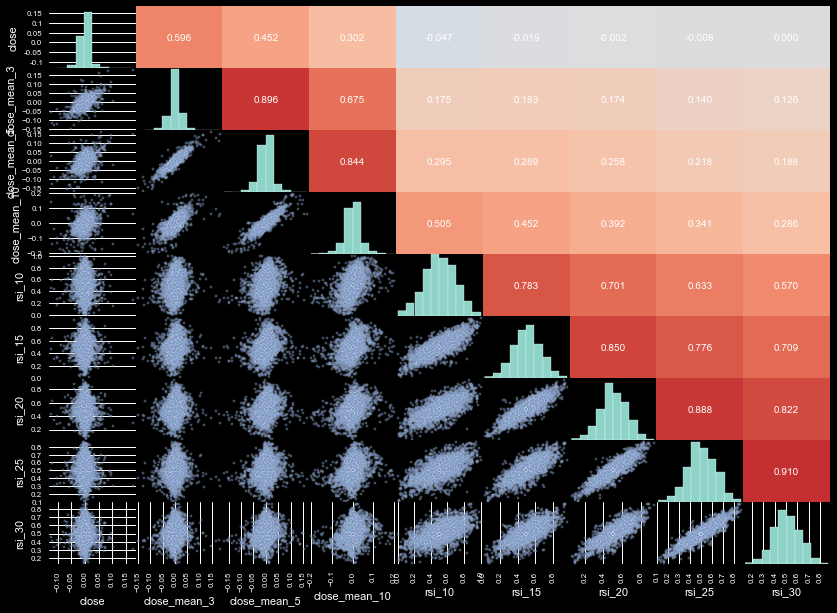

In [20]:
dv.corr_plot( foobar )

In [21]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.034013
rsi_15   -0.012625
rsi_20   -0.007140
rsi_25   -0.016229
rsi_30   -0.013616
dtype: float64
rsi_10    0.155670
rsi_15    0.151882
rsi_20    0.136625
rsi_25    0.108596
rsi_30    0.097512
dtype: float64
rsi_10    0.269417
rsi_15    0.250162
rsi_20    0.222144
rsi_25    0.186259
rsi_30    0.162455
dtype: float64
rsi_10    0.460878
rsi_15    0.401477
rsi_20    0.350158
rsi_25    0.305333
rsi_30    0.258293
dtype: float64


In [119]:
# RSI 10, 15 good

In [22]:
foobar = bar.join( bands, how='inner' )

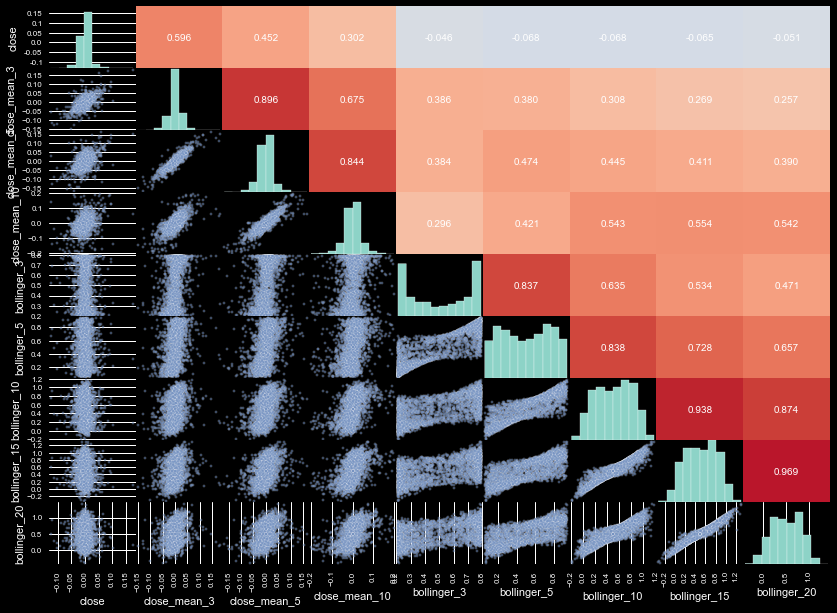

In [23]:
dv.corr_plot( foobar )

In [127]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.016157
bollinger_5    -0.021850
bollinger_10   -0.030471
bollinger_15   -0.028346
bollinger_20   -0.026081
dtype: float64
bollinger_3     0.385588
bollinger_5     0.372848
bollinger_10    0.295191
bollinger_15    0.260574
bollinger_20    0.237126
dtype: float64
bollinger_3     0.392112
bollinger_5     0.456536
bollinger_10    0.417366
bollinger_15    0.383613
bollinger_20    0.357781
dtype: float64
bollinger_3     0.308717
bollinger_5     0.408207
bollinger_10    0.513754
bollinger_15    0.518946
bollinger_20    0.506777
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days